In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random

In [2]:
path = 'Dataset/'
data_dir = pathlib.Path(path)

In [3]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([], shape=(1, 0), dtype=float64)

In [4]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

0

In [5]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

In [6]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))

plot(str(Mild_Demented),"Mild_Demented")

IndexError: list index out of range

In [7]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))

plot(str(Moderate_Demented),"Moderate_Demented")

IndexError: list index out of range

C:\Users\user\Downloads\test1\Dataset\Non_Demented\non_331.jpg


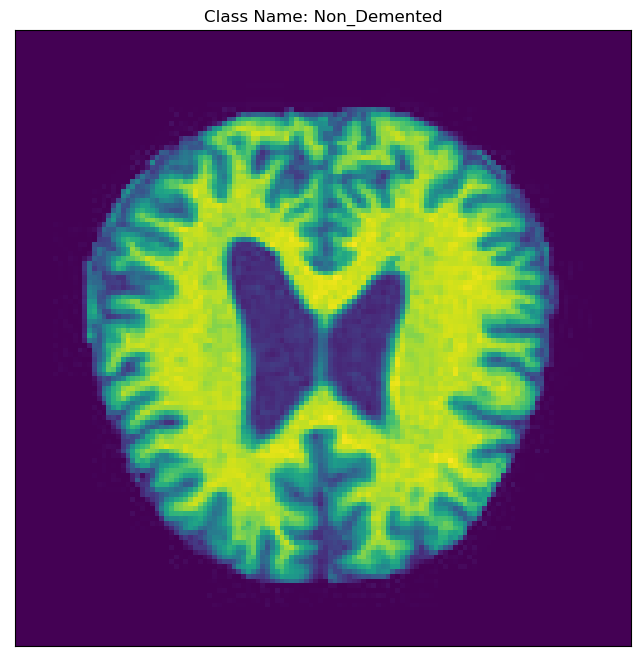

In [10]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

C:\Users\user\Downloads\test1\Dataset\Very_Mild_Demented\verymild_1572.jpg


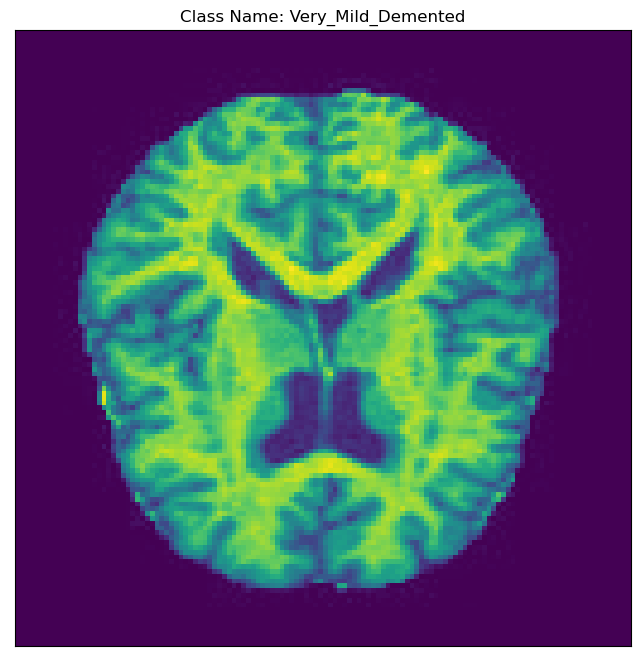

In [11]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

In [12]:
batch_size = 32
img_height = 224
img_width = 224

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

test_data = image_dataset_from_directory(data_dir,                                       
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.
Found 10 files belonging to 1 classes.


In [14]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

In [15]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [16]:
epochs = 5 
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/5
160/160 [==============================] - 57s 351ms/step - loss: 1.0187 - accuracy: 0.5123 - val_loss: 0.8728 - val_accuracy: 0.6055
Epoch 2/5
160/160 [==============================] - 55s 344ms/step - loss: 0.8245 - accuracy: 0.6230 - val_loss: 0.6767 - val_accuracy: 0.7172
Epoch 3/5
160/160 [==============================] - 56s 352ms/step - loss: 0.6251 - accuracy: 0.7281 - val_loss: 0.5359 - val_accuracy: 0.7750
Epoch 4/5
160/160 [==============================] - 57s 355ms/step - loss: 0.4305 - accuracy: 0.8203 - val_loss: 0.3401 - val_accuracy: 0.8625
Epoch 5/5
160/160 [==============================] - 56s 347ms/step - loss: 0.3275 - accuracy: 0.8732 - val_loss: 0.1822 - val_accuracy: 0.9398


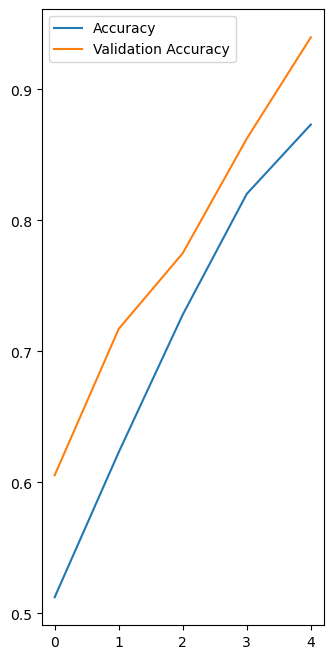

In [17]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()


1/1 [==============================] - 0s 19ms/step


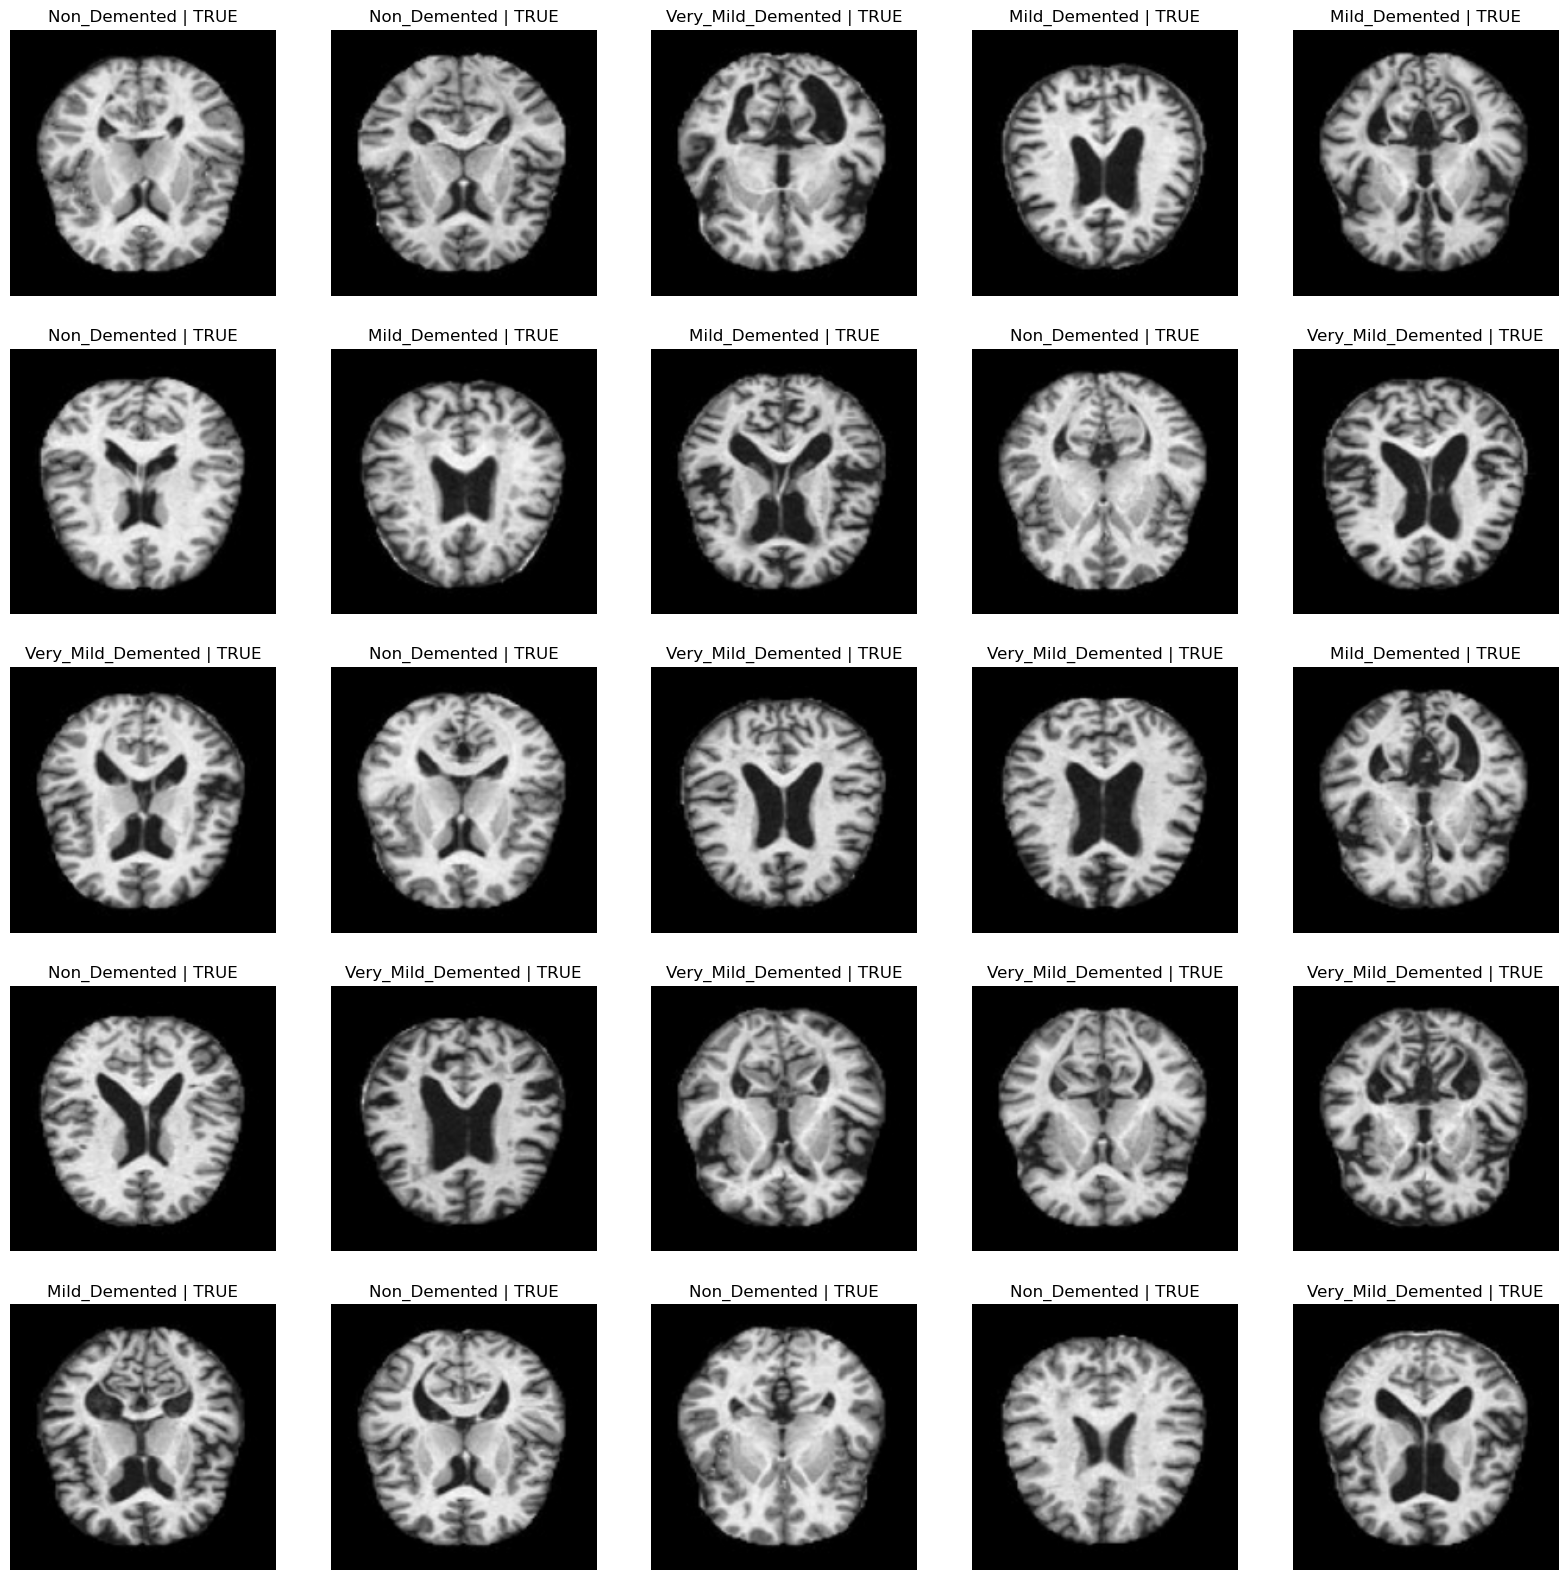

In [19]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")